In [1]:
!pip install keras

    100% |████████████████████████████████| 337kB 2.7MB/s ta 0:00:01
    100% |████████████████████████████████| 256kB 3.0MB/s ta 0:00:01
    100% |████████████████████████████████| 46.7MB 25kB/s  eta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /home/aladetan/.cache/pip/wheels/03/05/65/bdc14f2c6e09e82ae3e0f13d021e1b6b2481437ea2f207df3f
Successfully built pyyaml
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [158]:
!pip install scikit-learn

    100% |████████████████████████████████| 12.2MB 87kB/s  eta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [121]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
import spotipy
from spotipy import util
from config import config

In [77]:
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=config['spotify_id'], client_secret=config['spotify_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Quick tools

### check # of (all) labelled songs and features

In [128]:
l = pd.read_json('labelled', orient='rows')
f  = pd.read_json('features')
print(l.shape[1])
print(f.shape[0])
print l.shape[1] == f.shape[0]

1270
1270
True


## Data Collection

Features are already downloaded to save time/bandwith, but will continue to recollect data in notebook until data is too big/labelling is done

In [129]:
labelled = json.load(open('labelled'))

In [130]:
def mood_encode(moods):
    values = {'chill':0, 'hype':2, 'happy':1, 'sad':2}
#     chill happy 1
#     chill sad 2
#     hype happy 3
#     hype sad 4
    output = 0
    for mood in moods:
        output += values[mood]
        
    return output

In [131]:
sample = []
for row in labelled:
    label = mood_encode(labelled[row]['mood'])
    sample.append([row,labelled[row]['name'],label])
songs = pd.DataFrame(sample, columns=['id','title','label']).set_index('id')
songs.head()

,title,label
id,,
3KNlsVwlMjjKn1g2tTmiIe,She Said,3
72X7mJmnx6pHyRWvtelVkL,Safe,3
6BbINUfGabVyiNFJpQXn3x,Wicked,3
3s2eG9xSDGyd705tT0hD43,Magic City,3
2ImWMn8Pqxa8gHfk1ZJvAh,Use My Heart,2


In [132]:
features = pd.read_json('features').drop(columns=['analysis_url','track_href','uri','type']).set_index('id')
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
id,,,,,,,,,,,,,
4l94386YhnCzduk44xzFRx,0.00594,0.547,170960,0.848,0.000000,2,0.0743,-5.622,1,0.0680,128.987,4,0.393
07RULM1xjoEaal27GAsioi,0.21500,0.602,230027,0.678,0.000000,7,0.1150,-6.946,1,0.0300,95.496,4,0.922
1FvU97lrWOG2NRxErh6OZz,0.06330,0.897,334467,0.661,0.000000,8,0.1160,-6.200,0,0.2700,127.081,4,0.193
4XYOnP0tFe8ifE3hHitQBF,0.66700,0.528,189240,0.288,0.000000,0,0.1130,-8.608,0,0.0262,95.389,4,0.294
5NGcTyu5c4o5OQN2qDHMuq,0.32100,0.668,183053,0.759,0.000001,9,0.1470,-6.394,1,0.1380,198.052,4,0.925


In [133]:
data = songs.join(features)
data.head()

,title,label,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
id,,,,,,,,,,,,,,,
3KNlsVwlMjjKn1g2tTmiIe,She Said,3,0.00030,0.418,224640,0.945,0.00000,7,0.1060,-3.757,1,0.0683,165.041,4,0.693
72X7mJmnx6pHyRWvtelVkL,Safe,3,0.13800,0.691,185822,0.798,0.00000,9,0.3040,-4.493,1,0.0360,102.031,4,0.905
6BbINUfGabVyiNFJpQXn3x,Wicked,3,0.00191,0.718,173347,0.679,0.01040,11,0.3850,-5.899,0,0.0706,157.970,4,0.205
3s2eG9xSDGyd705tT0hD43,Magic City,3,0.08410,0.757,175238,0.867,0.09920,0,0.1250,-2.529,0,0.0362,125.962,4,0.499
2ImWMn8Pqxa8gHfk1ZJvAh,Use My Heart,2,0.20900,0.361,230253,0.658,0.00456,9,0.0887,-9.365,1,0.0400,82.979,4,0.169


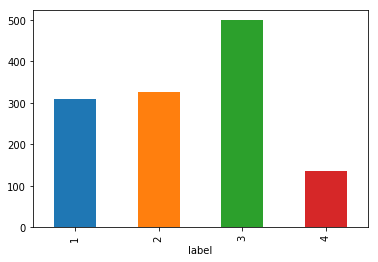

In [134]:
data.groupby(['label']).title.count().plot(kind='bar')

Need to reshape df to numpy array for keras

In [188]:
array = np.float32(data.drop(columns=['title','time_signature','speechiness']).values)
x = array[:,1:]
y = array[:,0]
dimension = x.shape[1]
print(dimension)
print(array.dtype)

11
float32


In [205]:
#encoding output - idk if necessary since i already changed them to 
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
print(dummy_y)

LabelEncoder()

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


## First NN Attempt

In [169]:
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

np.random.seed(7)

### Model & Compiling

In [190]:
def baseline_model():
    model = Sequential()
    model.add(Dense(16, input_dim=dimension, activation='relu'))
    model.add(Dense(dimension, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Fit

In [191]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)

In [192]:
estimator.fit(x, dummy_y)

Epoch 1/200
1270/1270 [==============================] - 1s 708us/step - loss: 14.3921 - acc: 0.1071
Epoch 2/200
1270/1270 [==============================] - 0s 321us/step - loss: 14.3921 - acc: 0.1071
Epoch 3/200
1270/1270 [==============================] - 0s 332us/step - loss: 14.3921 - acc: 0.1071
Epoch 4/200
1270/1270 [==============================] - 0s 344us/step - loss: 14.3921 - acc: 0.1071
Epoch 5/200
1270/1270 [==============================] - 0s 336us/step - loss: 14.3921 - acc: 0.1071
Epoch 6/200
1270/1270 [==============================] - 1s 401us/step - loss: 14.3921 - acc: 0.1071
Epoch 7/200
1270/1270 [==============================] - 0s 368us/step - loss: 14.3921 - acc: 0.1071
Epoch 8/200
1270/1270 [==============================] - 0s 338us/step - loss: 14.3921 - acc: 0.1071
Epoch 9/200
1270/1270 [==============================] - 0s 331us/step - loss: 14.3921 - acc: 0.1071
Epoch 10/200
1270/1270 [==============================] - 0s 362us/step - loss: 14.3921 - a

1270/1270 [==============================] - 0s 345us/step - loss: 14.3921 - acc: 0.1071
Epoch 82/200
1270/1270 [==============================] - 0s 337us/step - loss: 14.3921 - acc: 0.1071
Epoch 83/200
1270/1270 [==============================] - 0s 347us/step - loss: 14.3921 - acc: 0.1071
Epoch 84/200
1270/1270 [==============================] - 0s 346us/step - loss: 14.3921 - acc: 0.1071
Epoch 85/200
1270/1270 [==============================] - 0s 343us/step - loss: 14.3921 - acc: 0.1071
Epoch 86/200
1270/1270 [==============================] - 0s 354us/step - loss: 14.3921 - acc: 0.1071
Epoch 87/200
1270/1270 [==============================] - 0s 349us/step - loss: 14.3921 - acc: 0.1071
Epoch 88/200
1270/1270 [==============================] - 0s 327us/step - loss: 14.3921 - acc: 0.1071
Epoch 89/200
1270/1270 [==============================] - 0s 347us/step - loss: 14.3921 - acc: 0.1071
Epoch 90/200
1270/1270 [==============================] - 0s 345us/step - loss: 14.3921 - acc: 

1270/1270 [==============================] - 1s 455us/step - loss: 14.3921 - acc: 0.1071
Epoch 161/200
1270/1270 [==============================] - 0s 374us/step - loss: 14.3921 - acc: 0.1071
Epoch 162/200
1270/1270 [==============================] - 1s 505us/step - loss: 14.3921 - acc: 0.1071
Epoch 163/200
1270/1270 [==============================] - 1s 488us/step - loss: 14.3921 - acc: 0.1071
Epoch 164/200
1270/1270 [==============================] - 0s 343us/step - loss: 14.3921 - acc: 0.1071
Epoch 165/200
1270/1270 [==============================] - 1s 478us/step - loss: 14.3921 - acc: 0.1071
Epoch 166/200
1270/1270 [==============================] - 0s 312us/step - loss: 14.3921 - acc: 0.1071
Epoch 167/200
1270/1270 [==============================] - 0s 307us/step - loss: 14.3921 - acc: 0.1071
Epoch 168/200
1270/1270 [==============================] - 0s 306us/step - loss: 14.3921 - acc: 0.1071
Epoch 169/200
1270/1270 [==============================] - 0s 308us/step - loss: 14.392

### Evaluation

In [70]:
### need to split up testing and training data

In [175]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(estimator, x, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
1143/1143 [==============================] - 1s 582us/step - loss: 12.1697 - acc: 0.2450
Epoch 2/200
1143/1143 [==============================] - 0s 323us/step - loss: 12.1697 - acc: 0.2450
Epoch 3/200
1143/1143 [==============================] - 0s 338us/step - loss: 12.1697 - acc: 0.2450
Epoch 4/200
1143/1143 [==============================] - 0s 305us/step - loss: 12.1697 - acc: 0.2450
Epoch 5/200
1143/1143 [==============================] - 0s 376us/step - loss: 12.1697 - acc: 0.2450
Epoch 6/200
1143/1143 [==============================] - 0s 346us/step - loss: 12.1697 - acc: 0.2450
Epoch 7/200
1143/1143 [==============================] - 0s 330us/step - loss: 12.1697 - acc: 0.2450
Epoch 8/200
1143/1143 [==============================] - 0s 322us/step - loss: 12.1697 - acc: 0.2450
Epoch 9/200
1143/1143 [==============================] - 0s 338us/step - loss: 12.1697 - acc: 0.2450
Epoch 10/200
1143/1143 [==============================] - 0s 329us/step - loss: 12.1697 - a

1143/1143 [==============================] - 0s 305us/step - loss: 12.1697 - acc: 0.2450
Epoch 82/200
1143/1143 [==============================] - 0s 313us/step - loss: 12.1697 - acc: 0.2450
Epoch 83/200
1143/1143 [==============================] - 0s 303us/step - loss: 12.1697 - acc: 0.2450
Epoch 84/200
1143/1143 [==============================] - 0s 302us/step - loss: 12.1697 - acc: 0.2450
Epoch 85/200
1143/1143 [==============================] - 0s 374us/step - loss: 12.1697 - acc: 0.2450
Epoch 86/200
1143/1143 [==============================] - 0s 418us/step - loss: 12.1697 - acc: 0.2450
Epoch 87/200
1143/1143 [==============================] - 0s 403us/step - loss: 12.1697 - acc: 0.2450
Epoch 88/200
1143/1143 [==============================] - 0s 376us/step - loss: 12.1697 - acc: 0.2450
Epoch 89/200
1143/1143 [==============================] - 0s 421us/step - loss: 12.1697 - acc: 0.2450
Epoch 90/200
1143/1143 [==============================] - 0s 299us/step - loss: 12.1697 - acc: 

1143/1143 [==============================] - 0s 339us/step - loss: 12.1697 - acc: 0.2450
Epoch 161/200
1143/1143 [==============================] - 0s 382us/step - loss: 12.1697 - acc: 0.2450
Epoch 162/200
1143/1143 [==============================] - 0s 328us/step - loss: 12.1697 - acc: 0.2450
Epoch 163/200
1143/1143 [==============================] - 0s 314us/step - loss: 12.1697 - acc: 0.2450
Epoch 164/200
1143/1143 [==============================] - 0s 327us/step - loss: 12.1697 - acc: 0.2450
Epoch 165/200
1143/1143 [==============================] - 0s 309us/step - loss: 12.1697 - acc: 0.2450
Epoch 166/200
1143/1143 [==============================] - 0s 308us/step - loss: 12.1697 - acc: 0.2450
Epoch 167/200
1143/1143 [==============================] - 0s 352us/step - loss: 12.1697 - acc: 0.24500s - loss: 12.2498
Epoch 168/200
1143/1143 [==============================] - 1s 438us/step - loss: 12.1697 - acc: 0.2450
Epoch 169/200
1143/1143 [==============================] - 0s 375us/s

1143/1143 [==============================] - 0s 344us/step - loss: 14.3836 - acc: 0.1076
Epoch 40/200
1143/1143 [==============================] - 0s 344us/step - loss: 14.3836 - acc: 0.1076
Epoch 41/200
1143/1143 [==============================] - 0s 355us/step - loss: 14.3836 - acc: 0.1076
Epoch 42/200
1143/1143 [==============================] - 0s 354us/step - loss: 14.3836 - acc: 0.1076
Epoch 43/200
1143/1143 [==============================] - 0s 353us/step - loss: 14.3836 - acc: 0.1076
Epoch 44/200
1143/1143 [==============================] - 0s 398us/step - loss: 14.3836 - acc: 0.1076
Epoch 45/200
1143/1143 [==============================] - 0s 334us/step - loss: 14.3836 - acc: 0.1076
Epoch 46/200
1143/1143 [==============================] - 0s 352us/step - loss: 14.3836 - acc: 0.1076
Epoch 47/200
1143/1143 [==============================] - 0s 316us/step - loss: 14.3836 - acc: 0.1076
Epoch 48/200
1143/1143 [==============================] - 0s 351us/step - loss: 14.3836 - acc: 

1143/1143 [==============================] - 0s 320us/step - loss: 14.3836 - acc: 0.1076
Epoch 120/200
1143/1143 [==============================] - 0s 294us/step - loss: 14.3836 - acc: 0.1076
Epoch 121/200
1143/1143 [==============================] - 0s 325us/step - loss: 14.3836 - acc: 0.1076
Epoch 122/200
1143/1143 [==============================] - 0s 307us/step - loss: 14.3836 - acc: 0.1076
Epoch 123/200
1143/1143 [==============================] - 0s 297us/step - loss: 14.3836 - acc: 0.1076
Epoch 124/200
1143/1143 [==============================] - 0s 298us/step - loss: 14.3836 - acc: 0.1076
Epoch 125/200
1143/1143 [==============================] - 0s 304us/step - loss: 14.3836 - acc: 0.1076
Epoch 126/200
1143/1143 [==============================] - 0s 294us/step - loss: 14.3836 - acc: 0.1076
Epoch 127/200
1143/1143 [==============================] - 0s 302us/step - loss: 14.3836 - acc: 0.1076
Epoch 128/200
1143/1143 [==============================] - 0s 300us/step - loss: 14.383

1143/1143 [==============================] - 1s 536us/step - loss: 14.3836 - acc: 0.1076
Epoch 199/200
1143/1143 [==============================] - 0s 400us/step - loss: 14.3836 - acc: 0.1076
Epoch 200/200
127/127 [==============================] - 0s 980us/step
Epoch 1/200
1143/1143 [==============================] - 1s 570us/step - loss: 12.0568 - acc: 0.2520
Epoch 2/200
1143/1143 [==============================] - 0s 306us/step - loss: 12.0568 - acc: 0.2520
Epoch 3/200
1143/1143 [==============================] - 0s 321us/step - loss: 12.0568 - acc: 0.2520
Epoch 4/200
1143/1143 [==============================] - 0s 304us/step - loss: 12.0568 - acc: 0.2520
Epoch 5/200
1143/1143 [==============================] - 0s 304us/step - loss: 12.0568 - acc: 0.2520
Epoch 6/200
1143/1143 [==============================] - 0s 337us/step - loss: 12.0568 - acc: 0.2520
Epoch 7/200
1143/1143 [==============================] - 0s 336us/step - loss: 12.0568 - acc: 0.2520
Epoch 8/200
1143/1143 [=======

1143/1143 [==============================] - 0s 335us/step - loss: 12.0568 - acc: 0.2520
Epoch 78/200
1143/1143 [==============================] - 0s 331us/step - loss: 12.0568 - acc: 0.2520
Epoch 79/200
1143/1143 [==============================] - 0s 306us/step - loss: 12.0568 - acc: 0.2520
Epoch 80/200
1143/1143 [==============================] - 0s 339us/step - loss: 12.0568 - acc: 0.2520
Epoch 81/200
1143/1143 [==============================] - 0s 345us/step - loss: 12.0568 - acc: 0.2520
Epoch 82/200
1143/1143 [==============================] - 0s 371us/step - loss: 12.0568 - acc: 0.2520
Epoch 83/200
1143/1143 [==============================] - 0s 310us/step - loss: 12.0568 - acc: 0.2520
Epoch 84/200
1143/1143 [==============================] - 0s 341us/step - loss: 12.0568 - acc: 0.2520
Epoch 85/200
1143/1143 [==============================] - 0s 308us/step - loss: 12.0568 - acc: 0.2520
Epoch 86/200
1143/1143 [==============================] - 0s 319us/step - loss: 12.0568 - acc: 

1143/1143 [==============================] - 0s 324us/step - loss: 12.0568 - acc: 0.2520
Epoch 157/200
1143/1143 [==============================] - 0s 306us/step - loss: 12.0568 - acc: 0.2520
Epoch 158/200
1143/1143 [==============================] - 0s 299us/step - loss: 12.0568 - acc: 0.2520
Epoch 159/200
1143/1143 [==============================] - 0s 294us/step - loss: 12.0568 - acc: 0.2520
Epoch 160/200
1143/1143 [==============================] - 0s 351us/step - loss: 12.0568 - acc: 0.2520
Epoch 161/200
1143/1143 [==============================] - 0s 303us/step - loss: 12.0568 - acc: 0.2520
Epoch 162/200
1143/1143 [==============================] - 0s 322us/step - loss: 12.0568 - acc: 0.2520
Epoch 163/200
1143/1143 [==============================] - 0s 331us/step - loss: 12.0568 - acc: 0.2520
Epoch 164/200
1143/1143 [==============================] - 0s 306us/step - loss: 12.0568 - acc: 0.2520
Epoch 165/200
1143/1143 [==============================] - 0s 322us/step - loss: 12.056

1143/1143 [==============================] - 0s 338us/step - loss: 14.4118 - acc: 0.1059
Epoch 36/200
1143/1143 [==============================] - 0s 336us/step - loss: 14.4118 - acc: 0.1059
Epoch 37/200
1143/1143 [==============================] - 0s 311us/step - loss: 14.4118 - acc: 0.1059
Epoch 38/200
1143/1143 [==============================] - 0s 369us/step - loss: 14.4118 - acc: 0.1059
Epoch 39/200
1143/1143 [==============================] - 0s 398us/step - loss: 14.4118 - acc: 0.1059
Epoch 40/200
1143/1143 [==============================] - 0s 350us/step - loss: 14.4118 - acc: 0.1059
Epoch 41/200
1143/1143 [==============================] - 0s 340us/step - loss: 14.4118 - acc: 0.1059
Epoch 42/200
1143/1143 [==============================] - 0s 367us/step - loss: 14.4118 - acc: 0.1059
Epoch 43/200
1143/1143 [==============================] - 0s 327us/step - loss: 14.4118 - acc: 0.1059
Epoch 44/200
1143/1143 [==============================] - 0s 312us/step - loss: 14.4118 - acc: 

1143/1143 [==============================] - 1s 473us/step - loss: 14.4118 - acc: 0.1059
Epoch 116/200
1143/1143 [==============================] - 0s 314us/step - loss: 14.4118 - acc: 0.1059
Epoch 117/200
1143/1143 [==============================] - 0s 325us/step - loss: 14.4118 - acc: 0.1059
Epoch 118/200
1143/1143 [==============================] - 0s 321us/step - loss: 14.4118 - acc: 0.1059
Epoch 119/200
1143/1143 [==============================] - 0s 376us/step - loss: 14.4118 - acc: 0.1059
Epoch 120/200
1143/1143 [==============================] - 0s 432us/step - loss: 14.4118 - acc: 0.1059
Epoch 121/200
1143/1143 [==============================] - 0s 340us/step - loss: 14.4118 - acc: 0.1059
Epoch 122/200
1143/1143 [==============================] - 0s 351us/step - loss: 14.4118 - acc: 0.1059
Epoch 123/200
1143/1143 [==============================] - 0s 436us/step - loss: 14.4118 - acc: 0.1059
Epoch 124/200
1143/1143 [==============================] - 0s 357us/step - loss: 14.411

1143/1143 [==============================] - 0s 323us/step - loss: 14.4118 - acc: 0.1059
Epoch 195/200
1143/1143 [==============================] - 0s 313us/step - loss: 14.4118 - acc: 0.1059
Epoch 196/200
1143/1143 [==============================] - 0s 331us/step - loss: 14.4118 - acc: 0.1059
Epoch 197/200
1143/1143 [==============================] - 0s 326us/step - loss: 14.4118 - acc: 0.1059
Epoch 198/200
1143/1143 [==============================] - 0s 367us/step - loss: 14.4118 - acc: 0.1059
Epoch 199/200
1143/1143 [==============================] - 0s 348us/step - loss: 14.4118 - acc: 0.1059
Epoch 200/200
127/127 [==============================] - 0s 1ms/step
Epoch 1/200
1143/1143 [==============================] - 1s 653us/step - loss: 9.7865 - acc: 0.3928
Epoch 2/200
1143/1143 [==============================] - 0s 332us/step - loss: 9.7865 - acc: 0.3928
Epoch 3/200
1143/1143 [==============================] - 0s 359us/step - loss: 9.7865 - acc: 0.3928
Epoch 4/200
1143/1143 [====

1143/1143 [==============================] - 0s 306us/step - loss: 9.7865 - acc: 0.3928
Epoch 75/200
1143/1143 [==============================] - 0s 307us/step - loss: 9.7865 - acc: 0.3928
Epoch 76/200
1143/1143 [==============================] - 0s 400us/step - loss: 9.7865 - acc: 0.3928
Epoch 77/200
1143/1143 [==============================] - 0s 343us/step - loss: 9.7865 - acc: 0.3928
Epoch 78/200
1143/1143 [==============================] - 0s 317us/step - loss: 9.7865 - acc: 0.3928
Epoch 79/200
1143/1143 [==============================] - 0s 314us/step - loss: 9.7865 - acc: 0.3928
Epoch 80/200
1143/1143 [==============================] - 0s 392us/step - loss: 9.7865 - acc: 0.3928
Epoch 81/200
1143/1143 [==============================] - 0s 329us/step - loss: 9.7865 - acc: 0.3928
Epoch 82/200
1143/1143 [==============================] - 0s 353us/step - loss: 9.7865 - acc: 0.3928
Epoch 83/200
1143/1143 [==============================] - 0s 385us/step - loss: 9.7865 - acc: 0.3928
Epo

1143/1143 [==============================] - 0s 318us/step - loss: 9.7865 - acc: 0.3928
Epoch 155/200
1143/1143 [==============================] - 0s 317us/step - loss: 9.7865 - acc: 0.3928
Epoch 156/200
1143/1143 [==============================] - 0s 319us/step - loss: 9.7865 - acc: 0.3928
Epoch 157/200
1143/1143 [==============================] - 0s 311us/step - loss: 9.7865 - acc: 0.3928
Epoch 158/200
1143/1143 [==============================] - 0s 309us/step - loss: 9.7865 - acc: 0.3928
Epoch 159/200
1143/1143 [==============================] - 0s 313us/step - loss: 9.7865 - acc: 0.3928
Epoch 160/200
1143/1143 [==============================] - 0s 307us/step - loss: 9.7865 - acc: 0.3928
Epoch 161/200
1143/1143 [==============================] - 0s 311us/step - loss: 9.7865 - acc: 0.3928
Epoch 162/200
1143/1143 [==============================] - 0s 304us/step - loss: 9.7865 - acc: 0.3928
Epoch 163/200
1143/1143 [==============================] - 0s 309us/step - loss: 9.7865 - acc: 0

1143/1143 [==============================] - 0s 385us/step - loss: 9.7865 - acc: 0.3928
Epoch 35/200
1143/1143 [==============================] - 0s 314us/step - loss: 9.7865 - acc: 0.3928
Epoch 36/200
1143/1143 [==============================] - 0s 317us/step - loss: 9.7865 - acc: 0.3928
Epoch 37/200
1143/1143 [==============================] - 0s 330us/step - loss: 9.7865 - acc: 0.3928
Epoch 38/200
1143/1143 [==============================] - 0s 306us/step - loss: 9.7865 - acc: 0.3928
Epoch 39/200
1143/1143 [==============================] - 0s 378us/step - loss: 9.7865 - acc: 0.3928
Epoch 40/200
1143/1143 [==============================] - 0s 339us/step - loss: 9.7865 - acc: 0.3928
Epoch 41/200
1143/1143 [==============================] - 0s 303us/step - loss: 9.7865 - acc: 0.3928
Epoch 42/200
1143/1143 [==============================] - 0s 300us/step - loss: 9.7865 - acc: 0.3928
Epoch 43/200
1143/1143 [==============================] - 0s 310us/step - loss: 9.7865 - acc: 0.3928
Epo

1143/1143 [==============================] - 0s 304us/step - loss: 9.7865 - acc: 0.3928
Epoch 115/200
1143/1143 [==============================] - 0s 300us/step - loss: 9.7865 - acc: 0.3928
Epoch 116/200
1143/1143 [==============================] - 0s 313us/step - loss: 9.7865 - acc: 0.3928
Epoch 117/200
1143/1143 [==============================] - 0s 302us/step - loss: 9.7865 - acc: 0.3928
Epoch 118/200
1143/1143 [==============================] - 0s 309us/step - loss: 9.7865 - acc: 0.3928
Epoch 119/200
1143/1143 [==============================] - 0s 297us/step - loss: 9.7865 - acc: 0.3928
Epoch 120/200
1143/1143 [==============================] - 0s 385us/step - loss: 9.7865 - acc: 0.3928
Epoch 121/200
1143/1143 [==============================] - 0s 314us/step - loss: 9.7865 - acc: 0.3928
Epoch 122/200
1143/1143 [==============================] - 0s 347us/step - loss: 9.7865 - acc: 0.3928
Epoch 123/200
1143/1143 [==============================] - 0s 377us/step - loss: 9.7865 - acc: 0

1143/1143 [==============================] - 0s 311us/step - loss: 9.7865 - acc: 0.3928
Epoch 195/200
1143/1143 [==============================] - 0s 380us/step - loss: 9.7865 - acc: 0.3928
Epoch 196/200
1143/1143 [==============================] - 0s 308us/step - loss: 9.7865 - acc: 0.3928
Epoch 197/200
1143/1143 [==============================] - 0s 320us/step - loss: 9.7865 - acc: 0.3928
Epoch 198/200
1143/1143 [==============================] - 0s 326us/step - loss: 9.7865 - acc: 0.3928
Epoch 199/200
1143/1143 [==============================] - 0s 312us/step - loss: 9.7865 - acc: 0.3928
Epoch 200/200
127/127 [==============================] - 0s 1ms/step
Epoch 1/200
1143/1143 [==============================] - 1s 672us/step - loss: 11.9440 - acc: 0.2590
Epoch 2/200
1143/1143 [==============================] - 0s 321us/step - loss: 11.9440 - acc: 0.2590
Epoch 3/200
1143/1143 [==============================] - 1s 462us/step - loss: 11.9440 - acc: 0.2590
Epoch 4/200
1143/1143 [=======

1143/1143 [==============================] - 1s 484us/step - loss: 11.9440 - acc: 0.2590
Epoch 75/200
1143/1143 [==============================] - 0s 324us/step - loss: 11.9440 - acc: 0.2590
Epoch 76/200
1143/1143 [==============================] - 0s 310us/step - loss: 11.9440 - acc: 0.2590
Epoch 77/200
1143/1143 [==============================] - 0s 323us/step - loss: 11.9440 - acc: 0.2590
Epoch 78/200
1143/1143 [==============================] - 0s 378us/step - loss: 11.9440 - acc: 0.2590
Epoch 79/200
1143/1143 [==============================] - 0s 339us/step - loss: 11.9440 - acc: 0.2590
Epoch 80/200
1143/1143 [==============================] - 0s 321us/step - loss: 11.9440 - acc: 0.2590
Epoch 81/200
1143/1143 [==============================] - 0s 375us/step - loss: 11.9440 - acc: 0.2590
Epoch 82/200
1143/1143 [==============================] - 0s 380us/step - loss: 11.9440 - acc: 0.2590
Epoch 83/200
1143/1143 [==============================] - 0s 384us/step - loss: 11.9440 - acc: 

1143/1143 [==============================] - 0s 333us/step - loss: 11.9440 - acc: 0.2590
Epoch 154/200
1143/1143 [==============================] - 0s 314us/step - loss: 11.9440 - acc: 0.2590
Epoch 155/200
1143/1143 [==============================] - 0s 326us/step - loss: 11.9440 - acc: 0.2590
Epoch 156/200
1143/1143 [==============================] - 0s 316us/step - loss: 11.9440 - acc: 0.2590
Epoch 157/200
1143/1143 [==============================] - 0s 323us/step - loss: 11.9440 - acc: 0.2590
Epoch 158/200
1143/1143 [==============================] - 0s 340us/step - loss: 11.9440 - acc: 0.2590
Epoch 159/200
1143/1143 [==============================] - 0s 390us/step - loss: 11.9440 - acc: 0.2590
Epoch 160/200
1143/1143 [==============================] - 0s 325us/step - loss: 11.9440 - acc: 0.2590
Epoch 161/200
1143/1143 [==============================] - 0s 308us/step - loss: 11.9440 - acc: 0.2590
Epoch 162/200
1143/1143 [==============================] - 0s 313us/step - loss: 11.944

1143/1143 [==============================] - 0s 306us/step - loss: 14.3695 - acc: 0.1085
Epoch 33/200
1143/1143 [==============================] - 0s 306us/step - loss: 14.3695 - acc: 0.1085
Epoch 34/200
1143/1143 [==============================] - 0s 302us/step - loss: 14.3695 - acc: 0.1085
Epoch 35/200
1143/1143 [==============================] - 0s 313us/step - loss: 14.3695 - acc: 0.1085
Epoch 36/200
1143/1143 [==============================] - 0s 305us/step - loss: 14.3695 - acc: 0.1085
Epoch 37/200
1143/1143 [==============================] - 0s 322us/step - loss: 14.3695 - acc: 0.1085
Epoch 38/200
1143/1143 [==============================] - 0s 315us/step - loss: 14.3695 - acc: 0.1085
Epoch 39/200
1143/1143 [==============================] - 0s 298us/step - loss: 14.3695 - acc: 0.1085
Epoch 40/200
1143/1143 [==============================] - 0s 309us/step - loss: 14.3695 - acc: 0.1085
Epoch 41/200
1143/1143 [==============================] - 0s 312us/step - loss: 14.3695 - acc: 

1143/1143 [==============================] - 1s 710us/step - loss: 14.3695 - acc: 0.1085
Epoch 113/200
1143/1143 [==============================] - 1s 575us/step - loss: 14.3695 - acc: 0.1085
Epoch 114/200
1143/1143 [==============================] - 1s 560us/step - loss: 14.3695 - acc: 0.1085
Epoch 115/200
1143/1143 [==============================] - 1s 594us/step - loss: 14.3695 - acc: 0.1085
Epoch 116/200
1143/1143 [==============================] - 0s 366us/step - loss: 14.3695 - acc: 0.1085
Epoch 117/200
1143/1143 [==============================] - 0s 348us/step - loss: 14.3695 - acc: 0.1085
Epoch 118/200
1143/1143 [==============================] - 0s 365us/step - loss: 14.3695 - acc: 0.1085
Epoch 119/200
1143/1143 [==============================] - 0s 297us/step - loss: 14.3695 - acc: 0.1085
Epoch 120/200
1143/1143 [==============================] - 0s 306us/step - loss: 14.3695 - acc: 0.1085
Epoch 121/200
1143/1143 [==============================] - 0s 384us/step - loss: 14.369

1143/1143 [==============================] - 0s 293us/step - loss: 14.3695 - acc: 0.1085
Epoch 192/200
1143/1143 [==============================] - 0s 294us/step - loss: 14.3695 - acc: 0.1085
Epoch 193/200
1143/1143 [==============================] - 0s 421us/step - loss: 14.3695 - acc: 0.1085
Epoch 194/200
1143/1143 [==============================] - 0s 291us/step - loss: 14.3695 - acc: 0.1085
Epoch 195/200
1143/1143 [==============================] - 0s 393us/step - loss: 14.3695 - acc: 0.1085
Epoch 196/200
1143/1143 [==============================] - 0s 296us/step - loss: 14.3695 - acc: 0.1085
Epoch 197/200
1143/1143 [==============================] - 0s 285us/step - loss: 14.3695 - acc: 0.1085
Epoch 198/200
1143/1143 [==============================] - 0s 291us/step - loss: 14.3695 - acc: 0.1085
Epoch 199/200
1143/1143 [==============================] - 0s 298us/step - loss: 14.3695 - acc: 0.1085
Epoch 200/200
127/127 [==============================] - 0s 1ms/step
Epoch 1/200
1143/1

1143/1143 [==============================] - 0s 353us/step - loss: 12.2261 - acc: 0.2415
Epoch 71/200
1143/1143 [==============================] - 0s 383us/step - loss: 12.2261 - acc: 0.2415
Epoch 72/200
1143/1143 [==============================] - 0s 398us/step - loss: 12.2261 - acc: 0.2415
Epoch 73/200
1143/1143 [==============================] - 0s 290us/step - loss: 12.2261 - acc: 0.2415
Epoch 74/200
1143/1143 [==============================] - 0s 281us/step - loss: 12.2261 - acc: 0.2415
Epoch 75/200
1143/1143 [==============================] - 0s 277us/step - loss: 12.2261 - acc: 0.2415
Epoch 76/200
1143/1143 [==============================] - 0s 277us/step - loss: 12.2261 - acc: 0.2415
Epoch 77/200
1143/1143 [==============================] - 0s 294us/step - loss: 12.2261 - acc: 0.2415
Epoch 78/200
1143/1143 [==============================] - 0s 278us/step - loss: 12.2261 - acc: 0.2415
Epoch 79/200
1143/1143 [==============================] - 0s 289us/step - loss: 12.2261 - acc: 

1143/1143 [==============================] - 0s 413us/step - loss: 12.2261 - acc: 0.2415
Epoch 150/200
1143/1143 [==============================] - 1s 479us/step - loss: 12.2261 - acc: 0.2415
Epoch 151/200
1143/1143 [==============================] - 0s 382us/step - loss: 12.2261 - acc: 0.2415
Epoch 152/200
1143/1143 [==============================] - 0s 309us/step - loss: 12.2261 - acc: 0.2415
Epoch 153/200
1143/1143 [==============================] - 0s 303us/step - loss: 12.2261 - acc: 0.2415
Epoch 154/200
1143/1143 [==============================] - 0s 295us/step - loss: 12.2261 - acc: 0.2415
Epoch 155/200
1143/1143 [==============================] - 0s 277us/step - loss: 12.2261 - acc: 0.2415
Epoch 156/200
1143/1143 [==============================] - 0s 293us/step - loss: 12.2261 - acc: 0.2415
Epoch 157/200
1143/1143 [==============================] - 0s 289us/step - loss: 12.2261 - acc: 0.2415
Epoch 158/200
1143/1143 [==============================] - 0s 378us/step - loss: 12.226

1143/1143 [==============================] - 0s 322us/step - loss: 14.4259 - acc: 0.1050
Epoch 29/200
1143/1143 [==============================] - 0s 304us/step - loss: 14.4259 - acc: 0.1050
Epoch 30/200
1143/1143 [==============================] - 0s 306us/step - loss: 14.4259 - acc: 0.1050
Epoch 31/200
1143/1143 [==============================] - 0s 319us/step - loss: 14.4259 - acc: 0.1050
Epoch 32/200
1143/1143 [==============================] - 0s 326us/step - loss: 14.4259 - acc: 0.1050
Epoch 33/200
1143/1143 [==============================] - 0s 354us/step - loss: 14.4259 - acc: 0.1050
Epoch 34/200
1143/1143 [==============================] - 0s 353us/step - loss: 14.4259 - acc: 0.1050
Epoch 35/200
1143/1143 [==============================] - 0s 327us/step - loss: 14.4259 - acc: 0.1050
Epoch 36/200
1143/1143 [==============================] - 0s 352us/step - loss: 14.4259 - acc: 0.1050
Epoch 37/200
1143/1143 [==============================] - 0s 326us/step - loss: 14.4259 - acc: 

1143/1143 [==============================] - 0s 356us/step - loss: 14.4259 - acc: 0.1050
Epoch 109/200
1143/1143 [==============================] - 0s 328us/step - loss: 14.4259 - acc: 0.1050
Epoch 110/200
1143/1143 [==============================] - 0s 338us/step - loss: 14.4259 - acc: 0.1050
Epoch 111/200
1143/1143 [==============================] - 0s 291us/step - loss: 14.4259 - acc: 0.1050
Epoch 112/200
1143/1143 [==============================] - 0s 335us/step - loss: 14.4259 - acc: 0.1050
Epoch 113/200
1143/1143 [==============================] - 0s 343us/step - loss: 14.4259 - acc: 0.1050
Epoch 114/200
1143/1143 [==============================] - 0s 310us/step - loss: 14.4259 - acc: 0.1050
Epoch 115/200
1143/1143 [==============================] - 0s 355us/step - loss: 14.4259 - acc: 0.1050
Epoch 116/200
1143/1143 [==============================] - 0s 350us/step - loss: 14.4259 - acc: 0.1050
Epoch 117/200
1143/1143 [==============================] - 0s 346us/step - loss: 14.425

1143/1143 [==============================] - 0s 338us/step - loss: 14.4259 - acc: 0.1050
Epoch 188/200
1143/1143 [==============================] - 0s 319us/step - loss: 14.4259 - acc: 0.1050
Epoch 189/200
1143/1143 [==============================] - 0s 304us/step - loss: 14.4259 - acc: 0.1050
Epoch 190/200
1143/1143 [==============================] - 0s 347us/step - loss: 14.4259 - acc: 0.1050
Epoch 191/200
1143/1143 [==============================] - 0s 340us/step - loss: 14.4259 - acc: 0.1050
Epoch 192/200
1143/1143 [==============================] - 0s 312us/step - loss: 14.4259 - acc: 0.1050
Epoch 193/200
1143/1143 [==============================] - 0s 393us/step - loss: 14.4259 - acc: 0.1050
Epoch 194/200
1143/1143 [==============================] - 0s 374us/step - loss: 14.4259 - acc: 0.1050
Epoch 195/200
1143/1143 [==============================] - 0s 382us/step - loss: 14.4259 - acc: 0.1050
Epoch 196/200
1143/1143 [==============================] - 0s 373us/step - loss: 14.425

### Predicting

Input a new song a get a prediction

In [201]:
spotify_song_id = '2KRQR1VK6OoJxpwVzwDv72' #funky duck by vulfpeck

In [198]:
spotify_song_id = '2gTYVoQCUh0QNUaFix01ld' #chun-li by nicki minaj

In [193]:
spotify_song_id = '2dBwB667LHQkLhdYlwLUZK' #summertime sadness by lana del rey

In [202]:
song_features = sp.audio_features([spotify_song_id])
song_input = pd.DataFrame(song_features).drop(columns=['analysis_url','track_href','uri','type','time_signature','speechiness']).set_index('id')
song_np = song_input.values
print(song_np)

[[ 3.0600e-01  8.0500e-01  1.3077e+05  7.7200e-01  1.1200e-03  1.0000e+01
   1.0300e-01 -6.4020e+00  0.0000e+00  8.1711e+01  9.6200e-01]]


In [204]:
predictions = estimator.predict(song_np)
# rounded = [round(x[0]) for x in predictions]
print(predictions)

1/1 [==============================] - 0s 928us/step
[3]
